In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("hotel_bookings.csv")
pd.set_option('display.max_columns', None)

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### data cleaning

In [6]:
df.shape

(119390, 32)

In [7]:
(df.isnull().sum() / df.shape[0]) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.drop(['company', 'agent'], axis = 1, inplace = True)

In [11]:
df.dropna(inplace = True)

In [12]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,1461


In [14]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [15]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [16]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("--------------")


hotel
['Resort Hotel' 'City Hotel']
--------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC

In [17]:
df['adr'].describe()

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<Axes: >

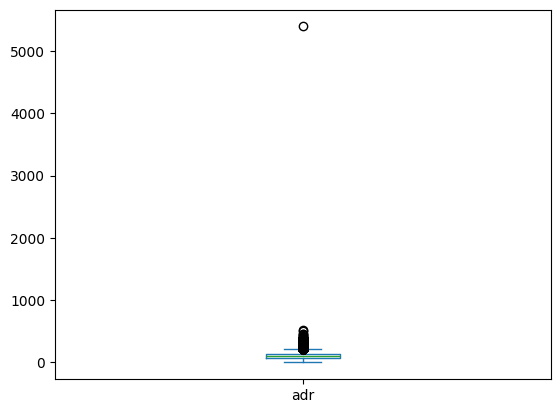

In [18]:
df['adr'].plot(kind = 'box')

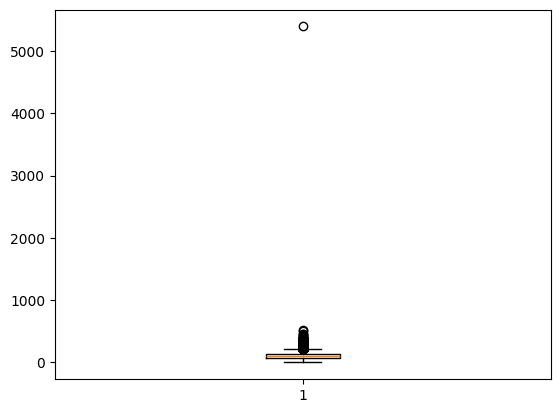

In [19]:
plt.boxplot(df['adr'])
plt.show()

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['adr'] >= lower_bound) & (df['adr'] <= upper_bound)]


# Print the summary statistics for the cleaned DataFrame
print(df['adr'].describe())


count    115015.000000
mean         97.107161
std          40.421284
min          -6.380000
25%          68.000000
50%          92.400000
75%         121.370000
max         210.000000
Name: adr, dtype: float64


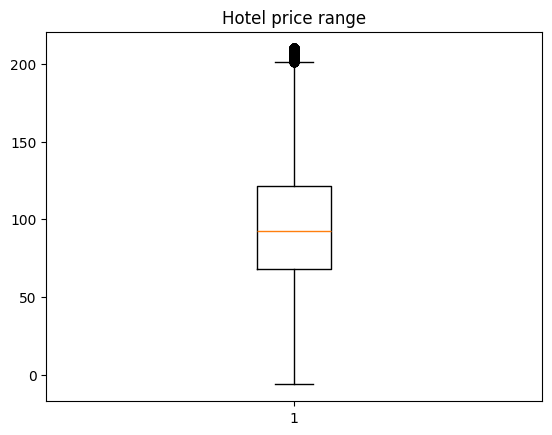

In [42]:
plt.boxplot(df['adr'])
plt.savefig('Hotel price range.png', format='png')
plt.title('Hotel price range')

plt.show()

# Data analysis and visualisations

In [22]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [23]:
df['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.629205
1    0.370795
Name: proportion, dtype: float64

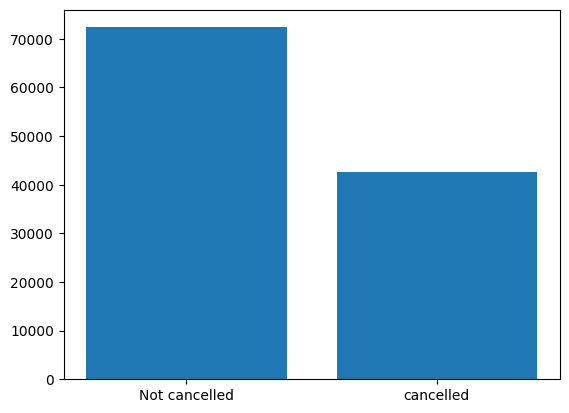

In [24]:
plt.bar(['Not cancelled', 'cancelled'],df['is_canceled'].value_counts())
plt.savefig('Bookings Cancellation Status.png', format='png')
plt.show()

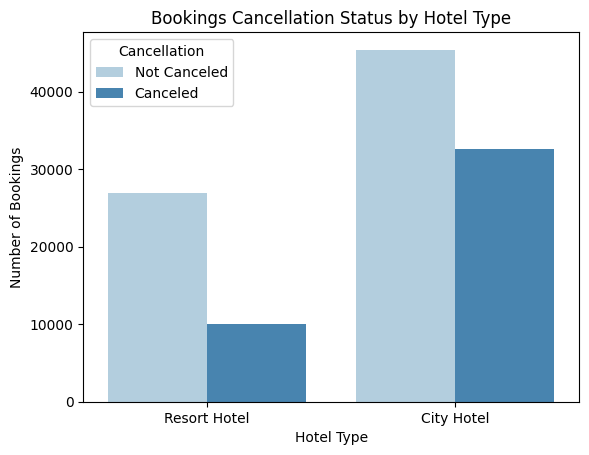

In [25]:
# Create a count plot to show the relationship between 'hotel' and 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=df, palette= 'Blues')

# Adding labels and title
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.title('Bookings Cancellation Status by Hotel Type')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.savefig('Bookings Cancellation Status by Hotel Type', format='png')
# Show the plot
plt.show()


In [26]:
 # Create a boolean Series to filter for 'Resort Hotel'
Resort_hotel = df[df['hotel'] == 'Resort Hotel']

# Calculate the normalized value counts for the 'is_canceled' column
Resort_hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.727997
1    0.272003
Name: proportion, dtype: float64

In [27]:
 # Create a boolean Series to filter for 'Resort Hotel'
City_Hotel = df[df['hotel'] == 'City Hotel']

# Calculate the normalized value counts for the 'is_canceled' column
 City_Hotel['is_canceled'].value_counts(normalize=True)


is_canceled
0    0.582297
1    0.417703
Name: proportion, dtype: float64

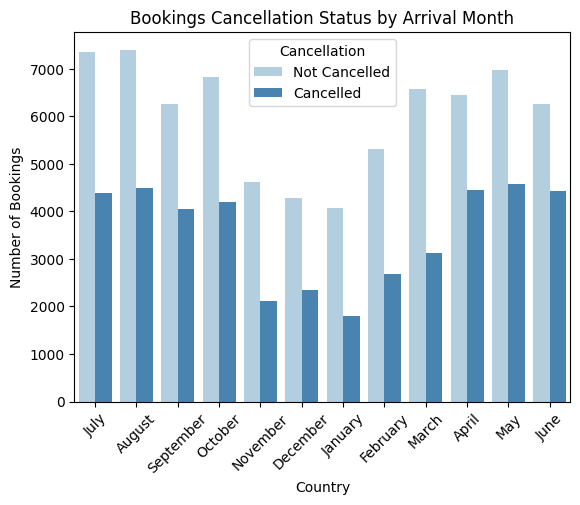

In [28]:

sns.countplot(x= 'arrival_date_month',  hue='is_canceled', data=df, palette= 'Blues')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Bookings Cancellation Status by Arrival Month')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'])
plt.xticks(rotation= 45)
plt.show()

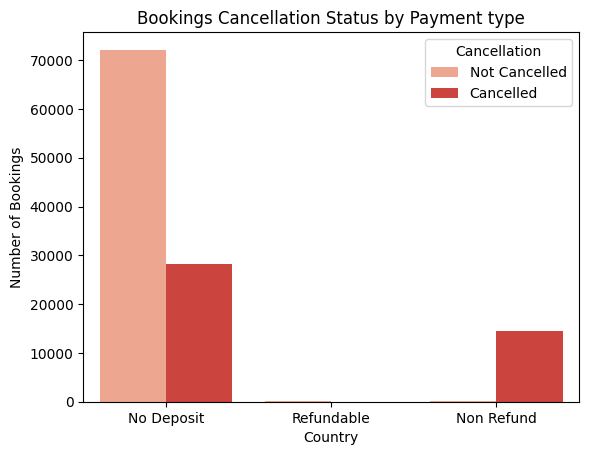

In [29]:
sns.countplot(x='deposit_type',  hue='is_canceled', data=df, palette= 'Reds')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Bookings Cancellation Status by Payment type')
plt.legend(title='Cancellation', labels=['Not Cancelled', 'Cancelled'])
plt.savefig('Bookings Cancellation Status by Month', format='png')
plt.show()

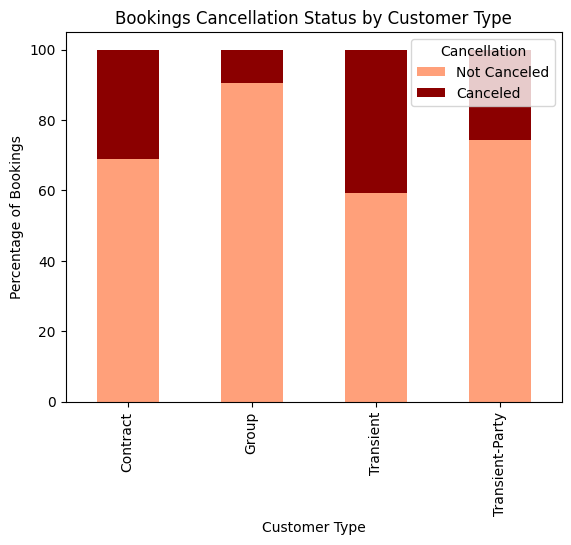

In [30]:
customer_type_counts = df.groupby('customer_type')['is_canceled'].value_counts(normalize=True).unstack()

# Multiply by 100 to convert proportions to percentages
customer_type_counts = customer_type_counts * 100

# Plot the normalized countplot
customer_type_counts.plot(kind='bar', stacked=True, color=['#FFA07A', '#8B0000'])

# Adding labels and title
plt.xlabel('Customer Type')
plt.ylabel('Percentage of Bookings')
plt.title('Bookings Cancellation Status by Customer Type')
plt.savefig('Bookings Cancellation Status by customer Type', format='png')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])

# Show the plot
plt.show()

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


C:\Users\user\AppData\Local\Temp\ipykernel_10216\1548473043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['reservation_status_date'].dt.month


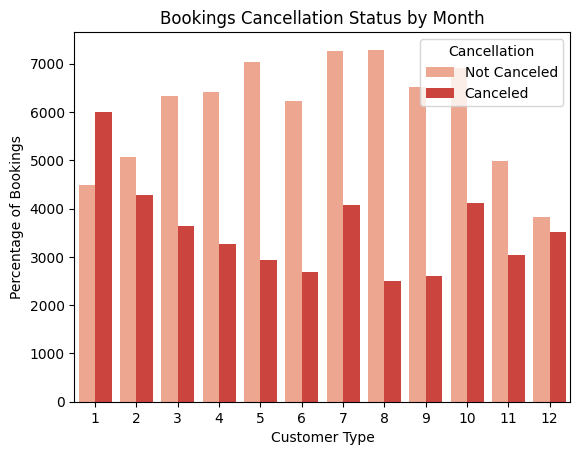

In [32]:
df['Month'] = df['reservation_status_date'].dt.month

sns.countplot(x= 'Month', hue ='is_canceled', data= df, palette= "Reds" )
plt.xlabel('Customer Type')
plt.ylabel('Percentage of Bookings')
plt.title('Bookings Cancellation Status by Month')
plt.savefig('Bookings Cancellation Status Month', format='png')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])

# Show the plot
plt.show()

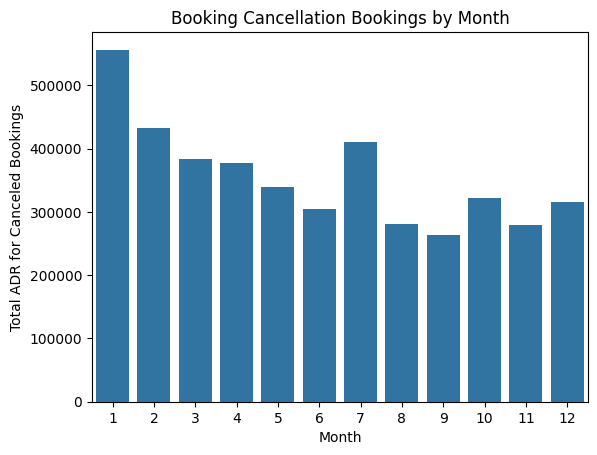

In [46]:

# Grouping the data by 'month' and calculating the sum of 'adr' for canceled bookings
monthly_adr = df[df['is_canceled'] == 1].groupby('Month')['adr'].sum().reset_index()

# Creating a barplot
sns.barplot(x='Month', y='adr', data=monthly_adr)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total ADR for Canceled Bookings')
plt.title('Booking Cancellation Bookings by Month')
plt.savefig('Bookings_Cancellation_Status_by reserved month', format='png', dpi=300)

# Show the plot
plt.show()

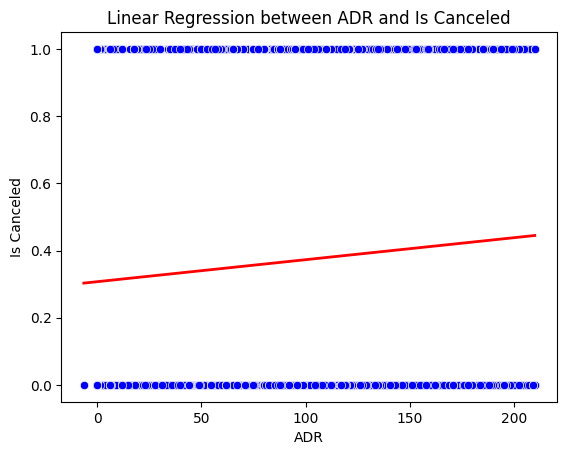

Regression Coefficient: 0.000654701575416803
Intercept: 0.3072189024605412
R-squared: 0.0030017679621171522


In [34]:
# Scatter plot with Seaborn
sns.scatterplot(x='adr', y='is_canceled', data=df, color='blue')

# Fit a linear regression model
X = df[['adr']].values  # Predictor variable (adr)
y = df['is_canceled'].values  # Response variable (is_canceled)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Plot the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2)

# Adding labels and title
plt.xlabel('ADR')
plt.ylabel('Is Canceled')
plt.title('Linear Regression between ADR and Is Canceled')
plt.savefig('Bookings Cancellation and hotel price relation', format='png')

# Show the plot
plt.show()

# Print the regression coefficient and intercept
print(f'Regression Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

# Print the R-squared value
print(f'R-squared: {model.score(X, y)}')

C:\Users\user\AppData\Local\Temp\ipykernel_10216\3811263348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='number_of_cancellations', data=top_10_countries_df, palette='viridis')


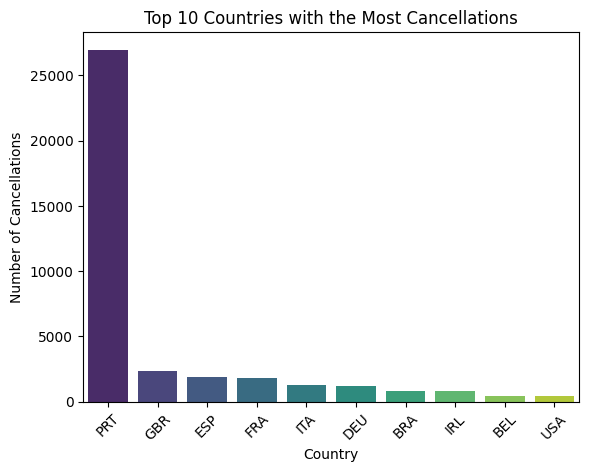

In [35]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_countries = cancelled_data['country'].value_counts().head(10)

# Convert the Series to a DataFrame for easier plotting
top_10_countries_df = top_10_countries.reset_index()
top_10_countries_df.columns = ['country', 'number_of_cancellations']

# Create the bar plot
sns.barplot(x='country', y='number_of_cancellations', data=top_10_countries_df, palette='viridis')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Cancellations')
plt.title('Top 10 Countries with the Most Cancellations')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig('Top 10 Countries with the Most Cancellations.png', format='png')

# Show the plot
plt.show()

In [36]:
top_10_countries

country
PRT    26964
GBR     2324
ESP     1917
FRA     1844
ITA     1289
DEU     1189
BRA      811
IRL      806
BEL      458
USA      458
Name: count, dtype: int64

In [37]:
confirmed_data= df[df['is_canceled'] == 0]
Top_10_confirmed_country= confirmed_data['country'].value_counts().head(10)

In [38]:
Top_10_confirmed_country

country
PRT    20267
GBR     9511
FRA     8283
DEU     6005
ESP     5957
IRL     2497
ITA     2371
BEL     1826
NLD     1682
USA     1492
Name: count, dtype: int64

In [39]:
Top_10_confirmed_country_df = Top_10_confirmed_country.reset_index()
Top_10_confirmed_country_df.columns =  ['country', 'number_of_confirmation']  

In [40]:
Top_10_confirmed_country_df

,country,number_of_confirmation
0,PRT,20267
1,GBR,9511
2,FRA,8283
3,DEU,6005
4,ESP,5957
5,IRL,2497
6,ITA,2371
7,BEL,1826
8,NLD,1682
9,USA,1492


In [ ]:
sns.barplot(x='country', y='number_of_confirmation', data=Top_10_confirmed_country_df, palette='viridis')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Confirmation')
plt.title('Top 10 Countries with the Most Confirmation')
plt.savefig('Top 10 Countries with the Most Confirmation', format='png')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df.head()

In [ ]:
df['market_segment'].value_counts(normalize=True)

In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)

In [ ]:
confirmed_data_by_adr = confirmed_data.groupby('reservation_status_date')[['adr']].mean()

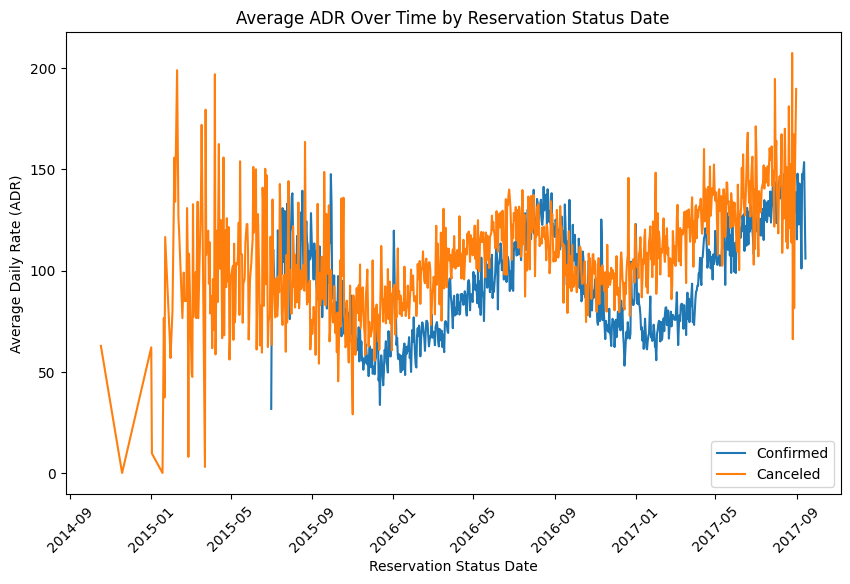

In [44]:


# Grouping the data by reservation_status_date and calculating the mean ADR for confirmed and canceled bookings
confirmed_data_by_adr = confirmed_data.groupby('reservation_status_date')['adr'].mean().reset_index()
cancel_by_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))  

# Plotting reservation_status_date on the x-axis and mean ADR on the y-axis for confirmed bookings
plt.plot(confirmed_data_by_adr['reservation_status_date'], confirmed_data_by_adr['adr'],
         label='Confirmed')

# Plotting reservation_status_date on the x-axis and mean ADR on the y-axis for canceled bookings
plt.plot(cancel_by_adr['reservation_status_date'], cancel_by_adr['adr'],
         label='Canceled')

# Adding labels and title
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('Average ADR Over Time by Reservation Status Date')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.savefig('Average ADR Over Time by Reservation Status Date.png', format='png')
# Adding a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()
